## Predict Customer Clicked Ads Classification by Using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Clicked Ads Dataset.csv')
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
423,423,58.03,31,198711940.0,129.33,Perempuan,6/29/2016 9:04,Yes,Tangerang,Banten,Otomotif
528,528,46.61,52,190687770.0,156.99,Perempuan,4/5/2016 5:54,Yes,Semarang,Jawa Tengah,Finance
682,682,43.57,36,356802110.0,125.20,Laki-Laki,6/25/2016 17:33,Yes,Surakarta,Jawa Tengah,Bank
316,316,75.84,21,339760260.0,186.98,Perempuan,2/7/2016 7:41,No,Bogor,Jawa Barat,Bank
138,138,71.89,23,431325860.0,172.81,Laki-Laki,2/3/2016 23:47,No,Semarang,Jawa Tengah,Furniture


In [3]:
df= df.drop(['Unnamed: 0'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [4]:
sum_missing = df.isna().sum()
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True)
missing_value_df

,column_name,sum_missing,percent_missing
0,Daily Time Spent on Site,13,1.3
1,Age,0,0.0
2,Area Income,13,1.3
3,Daily Internet Usage,11,1.1
4,Male,3,0.3
5,Timestamp,0,0.0
6,Clicked on Ad,0,0.0
7,city,0,0.0
8,province,0,0.0
9,category,0,0.0


In [5]:
nums = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
cats = ['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']

In [6]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [7]:
df[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


## EDA

### Univariate Analysis

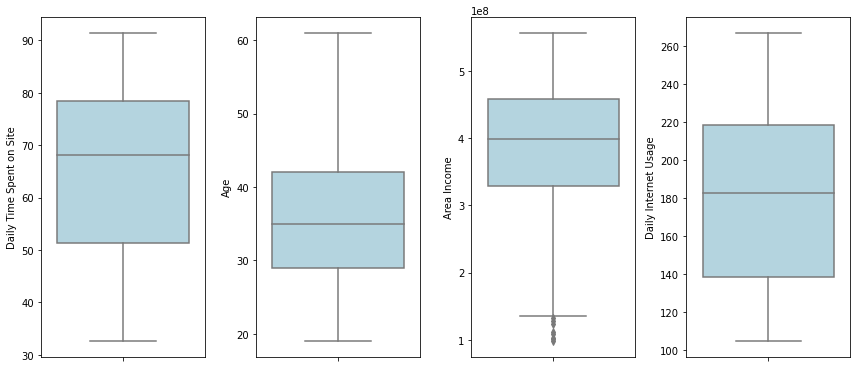

In [8]:
plt.figure(figsize=(15,15))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='lightblue', orient='v')
    plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Customers Daily Internet Usage')

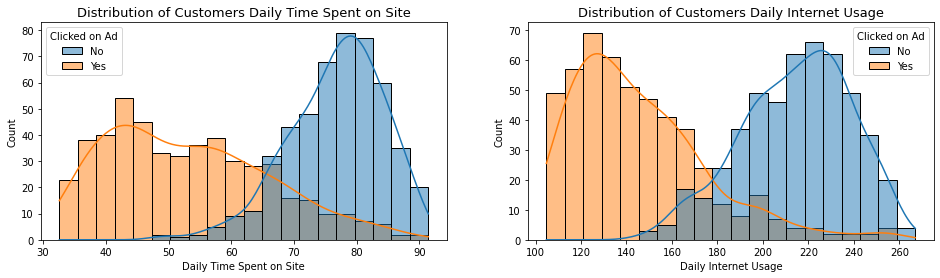

<Figure size 576x288 with 0 Axes>

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Daily Time Spent on Site', bins=20, kde=True, hue='Clicked on Ad', ax=axs[0])
sns.histplot(data=df, x='Daily Internet Usage', bins=20, kde=True, hue='Clicked on Ad', ax=axs[1])

axs[0].set_title('Distribution of Customers Daily Time Spent on Site', fontsize=13)
axs[1].set_title('Distribution of Customers Daily Internet Usage', fontsize=13)

Text(0.5, 1.0, 'Distribution of Customers Area Income')

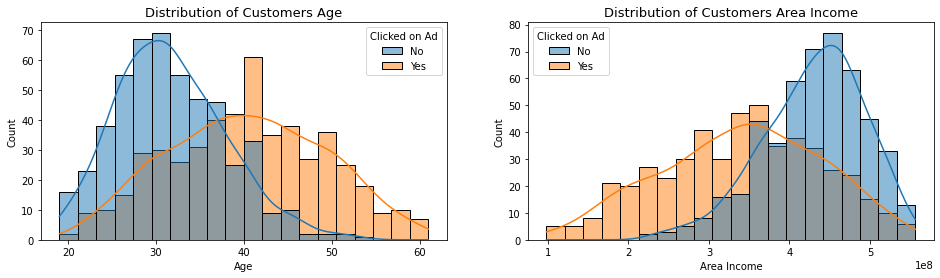

<Figure size 576x288 with 0 Axes>

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True, hue='Clicked on Ad', ax=axs[0])
sns.histplot(data=df, x='Area Income', bins=20, kde=True, hue='Clicked on Ad', ax=axs[1])

axs[0].set_title('Distribution of Customers Age', fontsize=13)
axs[1].set_title('Distribution of Customers Area Income', fontsize=13)

#### Visitor Characteristics

In [11]:
df_click = df[df['Clicked on Ad'] == 'Yes']

Text(0.5, 1.0, 'Total Clicked Ad by Age')

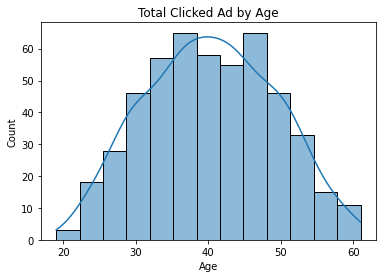

In [12]:
sns.histplot(data = df_click, x='Age', kde=True)
plt.title('Total Clicked Ad by Age')

Text(0.5, 1.0, 'Total Clicked Ad by Gender')

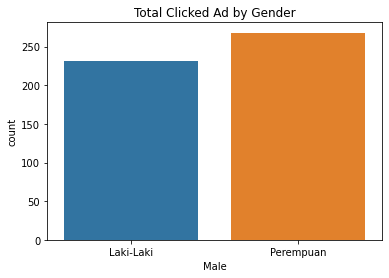

In [13]:
sns.countplot(data = df_click, x='Male')
plt.title('Total Clicked Ad by Gender')

Text(0.5, 1.0, 'Total Clicked Ad by Province')

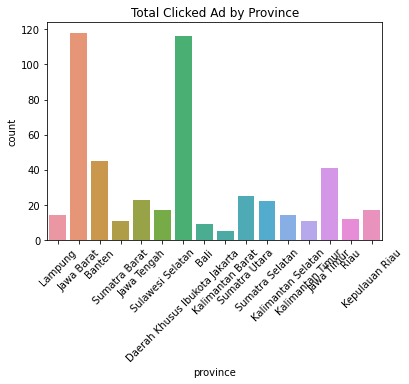

In [14]:
sns.countplot(data = df_click, x='province')
plt.xticks(rotation = 45)
plt.title('Total Clicked Ad by Province')

Text(0.5, 1.0, 'Total Clicked Ad by Category')

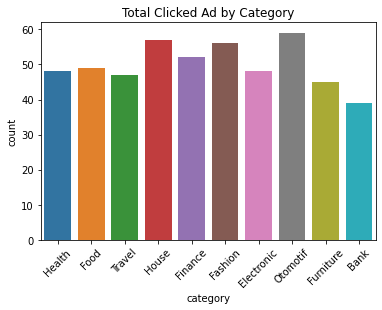

In [15]:
sns.countplot(data = df_click, x='category')
plt.xticks(rotation = 45)
plt.title('Total Clicked Ad by Category')

### Bivariate Analysis

Text(0.5, 1.0, 'Connection between column ')

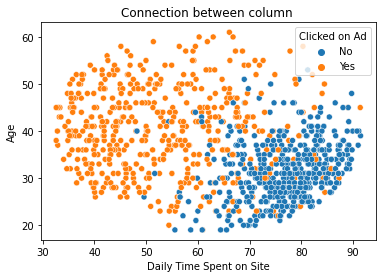

In [16]:
sns.scatterplot(data = df, x='Daily Time Spent on Site', y='Age', hue='Clicked on Ad')
plt.title('Connection between column ')

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

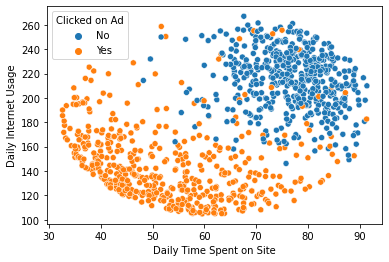

In [17]:
sns.scatterplot(data = df, x='Daily Time Spent on Site', y='Daily Internet Usage', hue='Clicked on Ad')

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Age'>

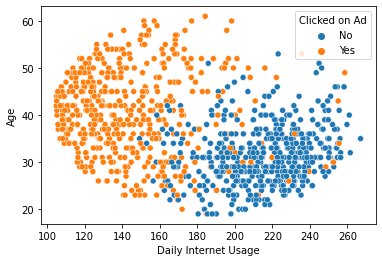

In [18]:
sns.scatterplot(data = df, x='Daily Internet Usage', y='Age', hue='Clicked on Ad')

### Multivariate Analysis

Text(0.5, 1.0, 'Feature Correlation')

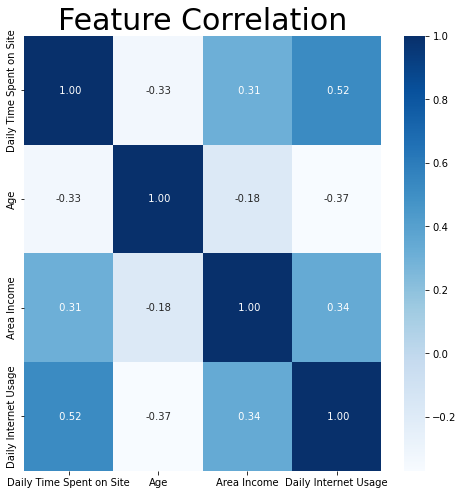

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt=' .2f')
plt.title('Feature Correlation', fontsize= 30)